1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals

maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
train = pd.read_csv('SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv('SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Visualizing Salary column of train and test .

Text(0.5, 1.0, 'Train Count Plot')

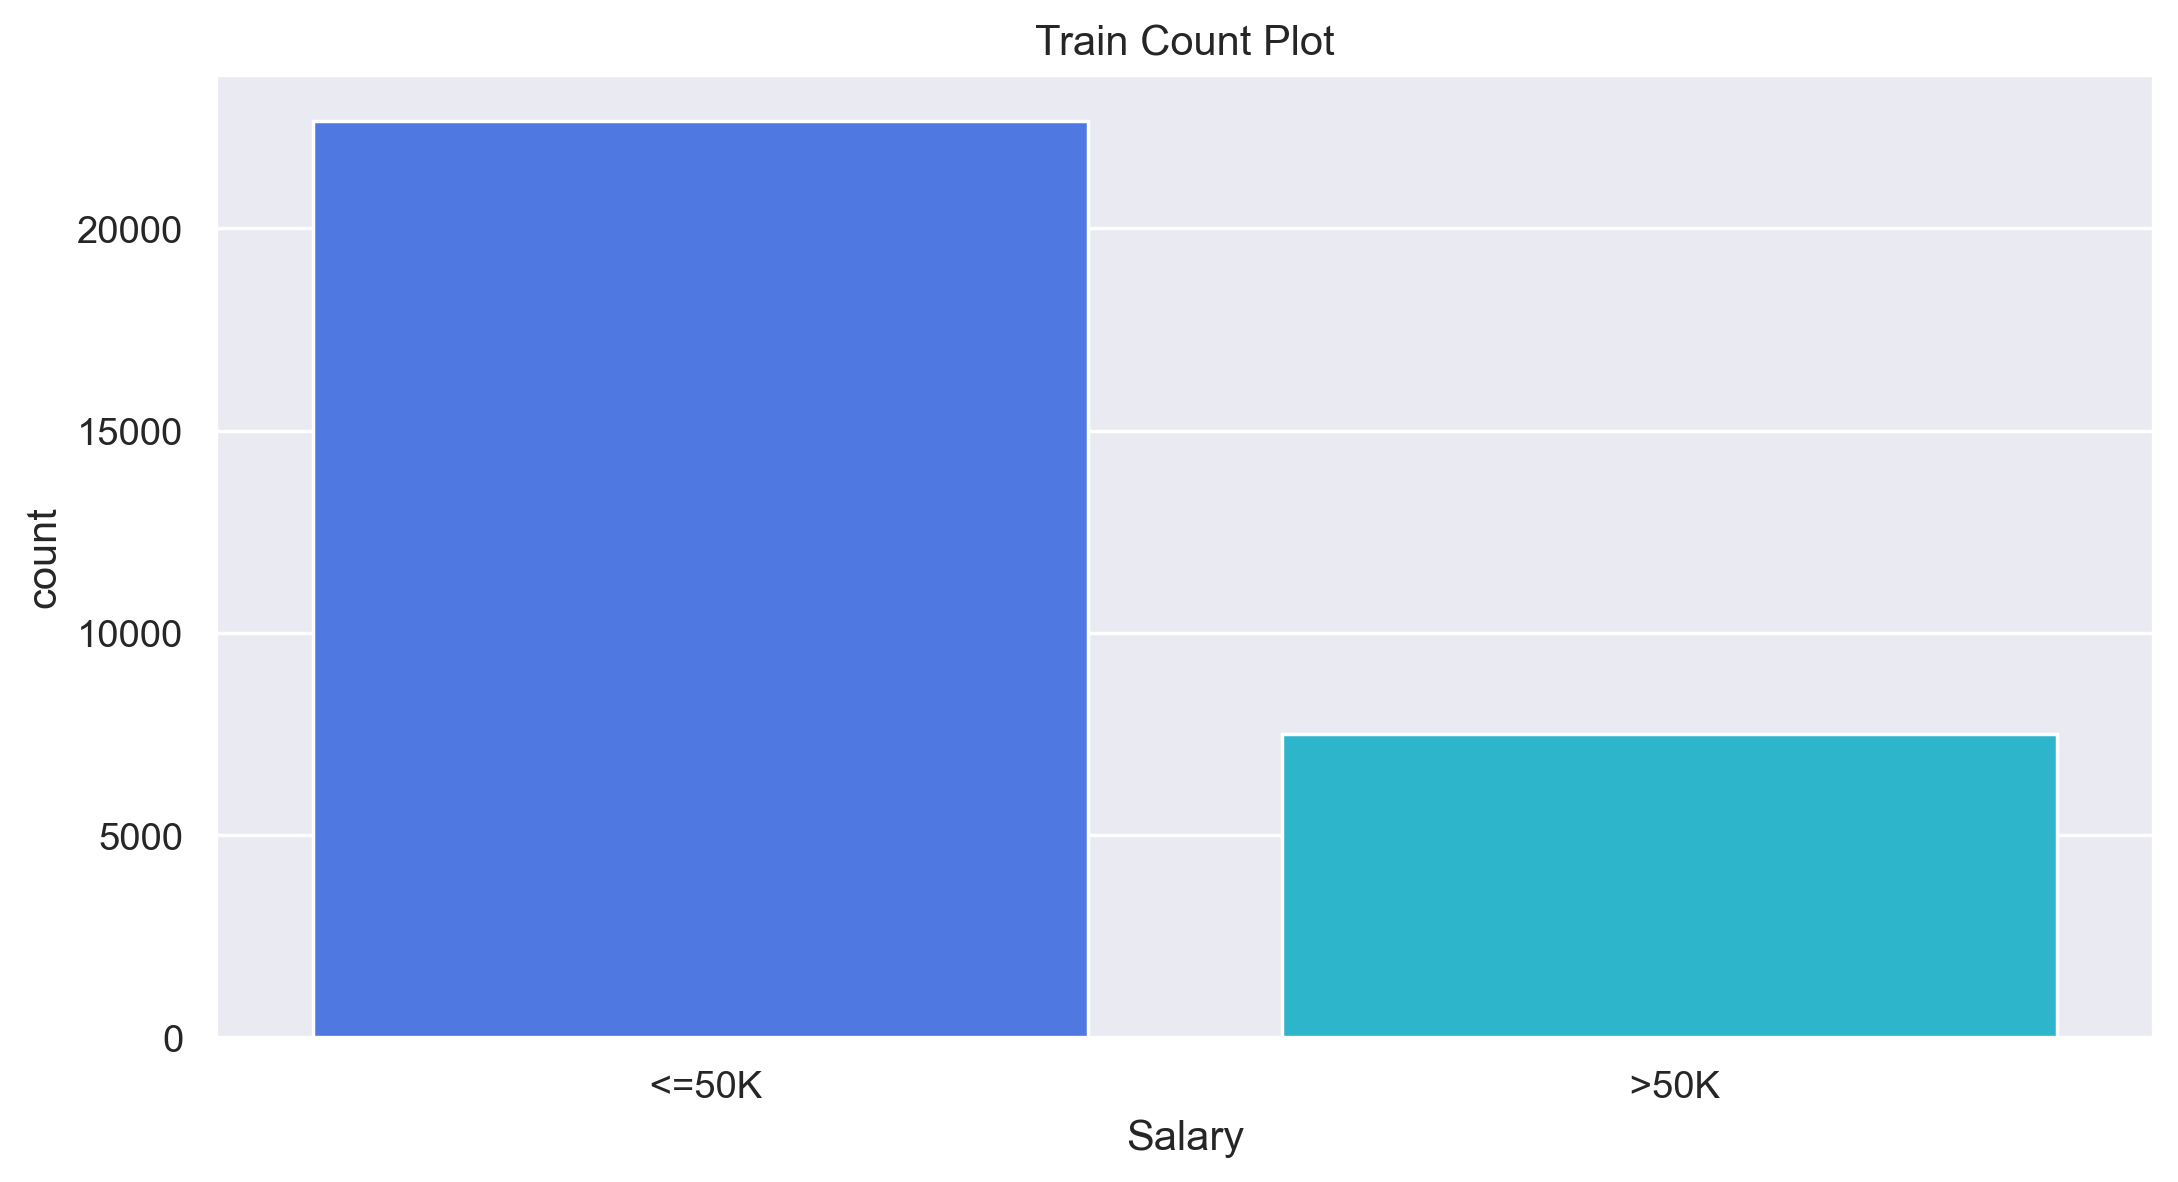

In [11]:
sns.countplot(x ='Salary',data=train)
plt.title('Train Count Plot')

Text(0.5, 1.0, 'Test Count Plot')

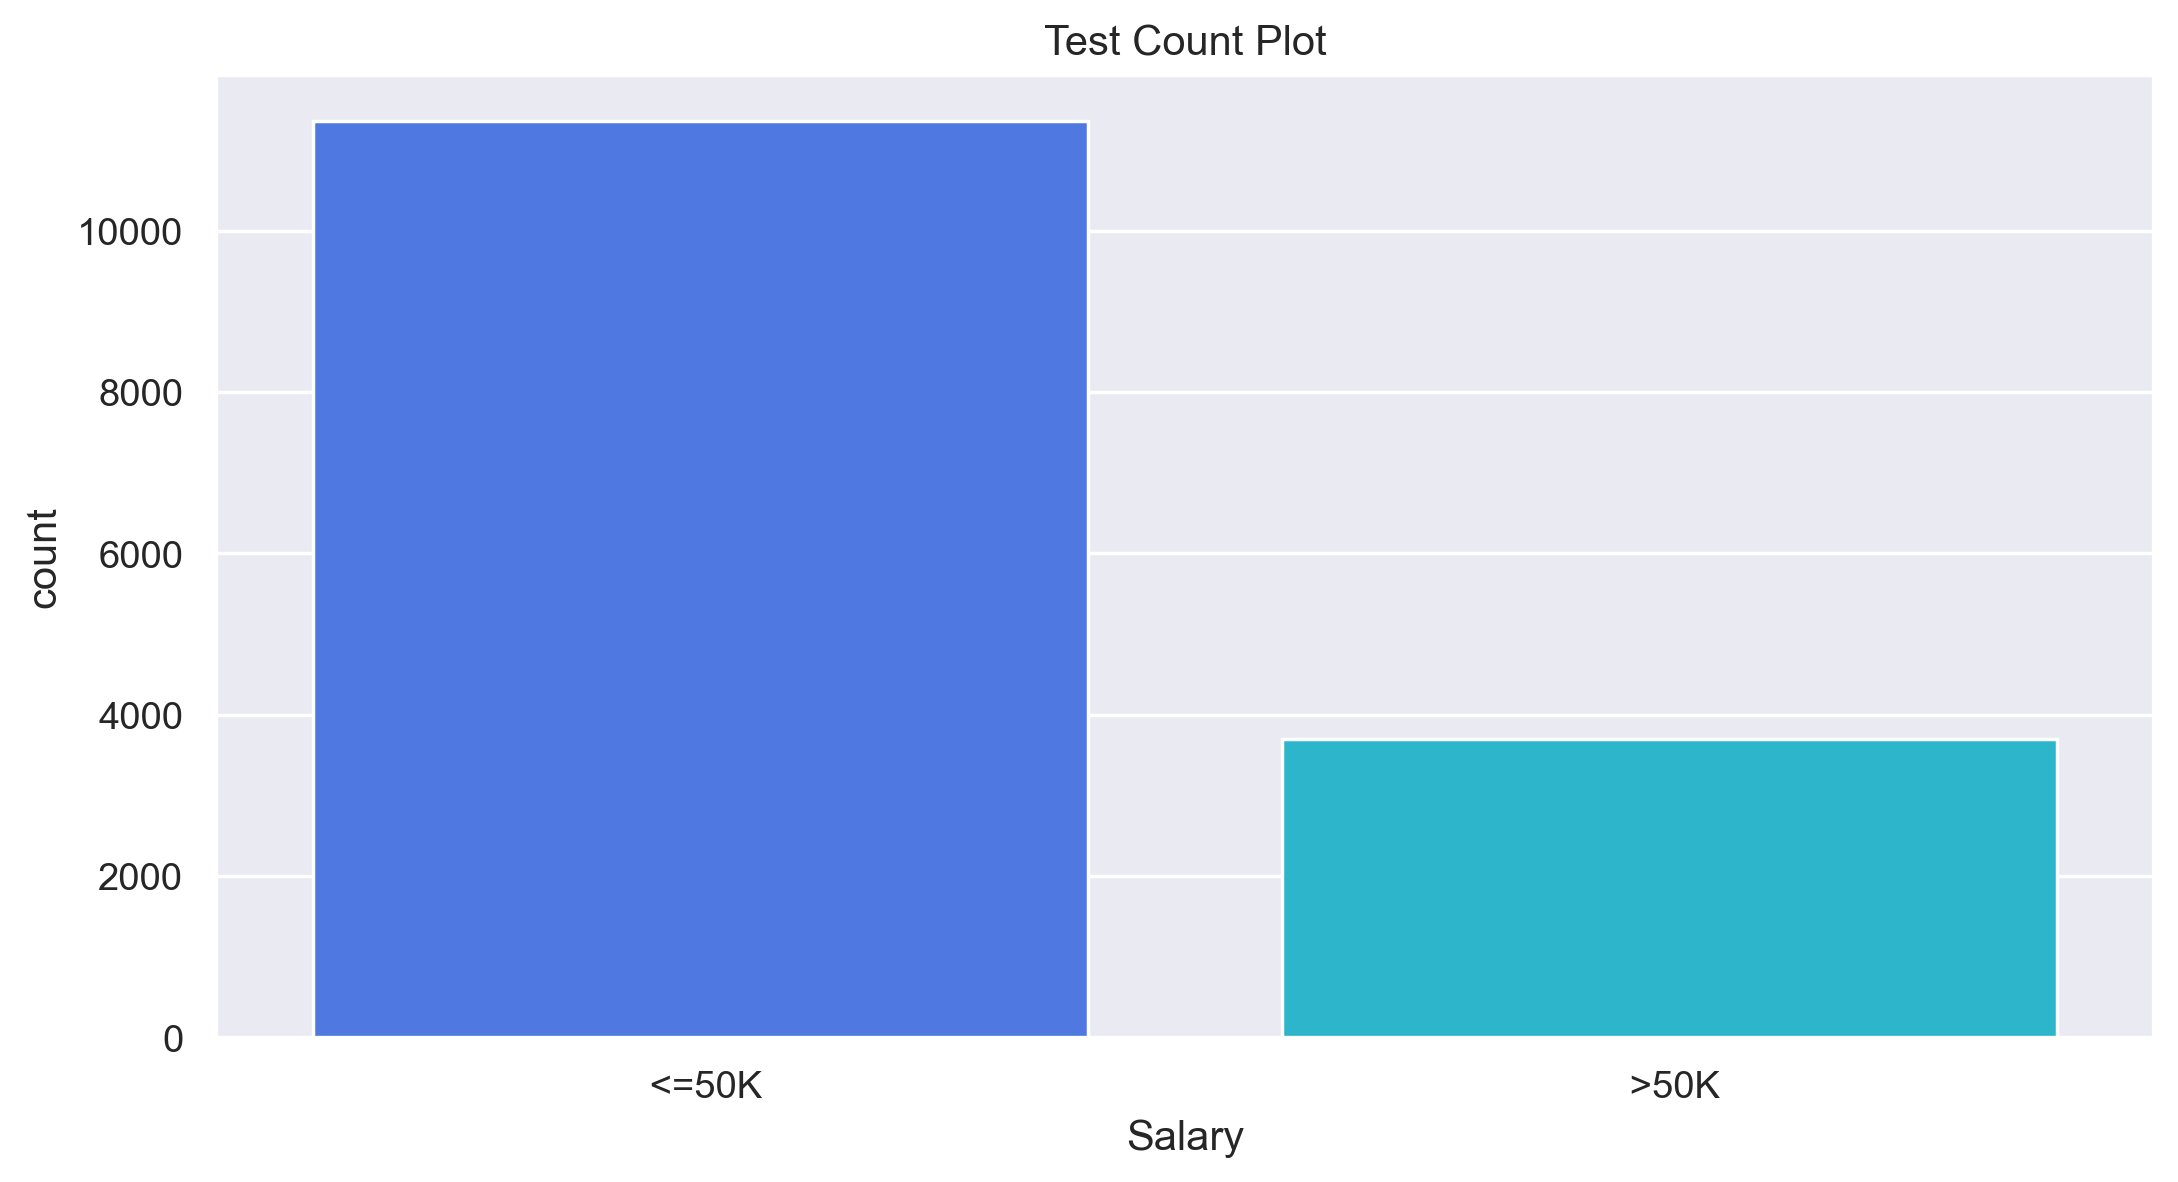

In [12]:
sns.countplot(x = 'Salary',data=test)
plt.title('Test Count Plot')

# Encoding of both train data and test data

In [15]:
cat_col = train.select_dtypes(object).columns
cat_col


Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [16]:
oe = OrdinalEncoder()
train[cat_col] = oe.fit_transform(train[cat_col])

In [17]:
train.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,0.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,0.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,0.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,0.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
5,37,2.0,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,37.0,0.0


In [18]:
cat_col = test.select_dtypes(object).columns
cat_col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [19]:
oe = OrdinalEncoder()
test[cat_col] = oe.fit_transform(test[cat_col])

In [20]:
test.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,0.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,0.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,1.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,1.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0.0
5,63,4.0,14.0,15,2.0,9.0,0.0,4.0,1.0,3103,0,32,37.0,1.0


# Spliting Data into training,testing

In [21]:
xtrain = train.iloc[:,:-1]
ytrain = train['Salary']

In [22]:
xtest = test.iloc[:,:-1]
ytest = test['Salary']

In [23]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtrain

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [24]:
xtest = sc.fit_transform(xtest)
xtest

array([[-1.02900513, -0.222347  , -2.42343884, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       ...,
       [-0.05742253, -0.222347  , -0.33254991, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [ 0.39100021, -0.222347  , -0.33254991, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.2816339 ,  0.81243231, -0.33254991, ..., -0.2191694 ,
         1.57915155,  0.26058067]])

# Model Buliding

In [25]:
svc = SVC()

In [26]:
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [27]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     12381
         1.0       0.55      0.76      0.64      2679

    accuracy                           0.85     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.87      0.85      0.86     15060



# Hyperparameter Tuning

In [31]:
params = {
    'kernel': ['poly','linear'],
    'C'     : [0.1],
    'gamma' : [0.1]
}

In [32]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [0.1],
                         'kernel': ['poly', 'linear']},
             verbose=1)

In [33]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [34]:
svc = SVC(C=0.1,kernel='poly',gamma=0.1)
svc.fit(xtrain,ytrain)

SVC(C=0.1, gamma=0.1, kernel='poly')

In [35]:
ypred = svc.predict(xtest)

In [36]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90     12998
         1.0       0.44      0.79      0.57      2062

    accuracy                           0.83     15060
   macro avg       0.70      0.82      0.73     15060
weighted avg       0.89      0.83      0.85     15060



In [37]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.8348529558038527
0.8335989375830013


# Here we have Generalize model with accuracy of

Traning:- 83.48%
    
Testing :- 83.35%